<a href="https://colab.research.google.com/github/Rodrigocid17/Graficas-codigos/blob/main/TP/Problema3Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEMAS EXAMEN PARCIAL TERCER PROBLEMA

Macías Cid Rodrigo

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$\frac{\partial u(0,t)}{\partial x}=0 ,\frac{\partial u(1,t)}{\partial x}=0, \;\;\; t>0$$
 con condiciones de f(x): 
$$u(x,0)=2x+1,\;\;\;0<x<1 $$
Para:
$$f(x)=\left\lbrace\begin{array}{c} -2 \;\; ~si\;\; 0<x\leq \frac{1}{2}\;\;\;\;  \\ 0 \; ~si \;\;\; \frac{1}{2}<x<1 \end{array}\right.$$

Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=-1-\sum_{n=1}^{\infty}[\frac{4}{n\pi}sen(\frac{n\pi}{2})]cos(n\pi x)e^{-(n\pi )^2 t}$$

In [ ]:
from pylab import *
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if (x[i]<=1/2):
          y[i]=-2
        if (x[i]>1/2) and (x[i]<1):
          y[i]=0  
    return y

Iniciamos graficando la condición inicial en los parametros de la función 

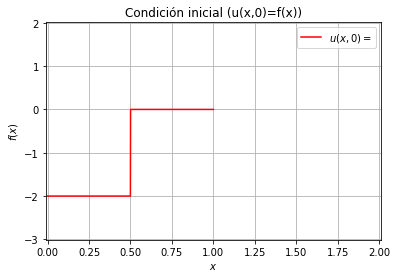

In [ ]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,"r",label='$u(x,0)=$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,2.01]),ylim([-3.01,2.01]),grid(),legend()
show()
def u_0(x,N=20): 
    f = zeros(len(x))
    for n in range(1,N):
        f += sin(n*pi/2)*cos(n*pi*x)/n
    return -1-4/pi*f

In [ ]:
f_n = u_0(x)

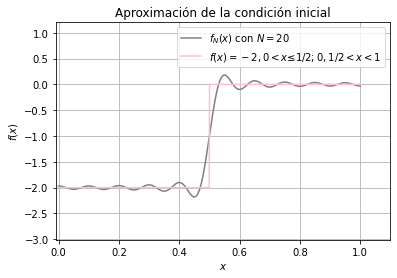

In [ ]:
plot(x,f_n,"gray",label='$f_N(x)$ con $N=20$')
plot(x,f,"pink",label='$f(x)=-2, 0<x≤1/2; 0, 1/2<x<1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-3.01,1.2]),grid(),legend()
show()

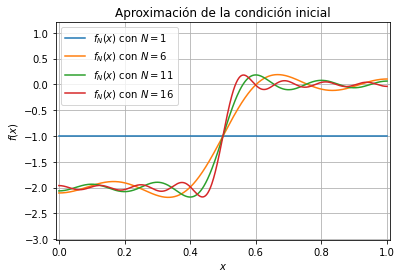

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-3.01,1.2]),grid(),legend()
show()

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += sin(n*pi/2)*cos(n*pi*x)/n*exp((-n*pi**2)*t[i])
    return -1-4/pi*f


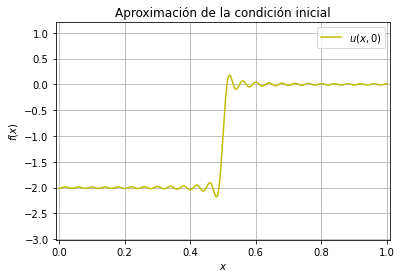

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)
plot(x,U[:,0],"y",label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-3.01,1.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

Y lo podemos observar de la siguiente manera

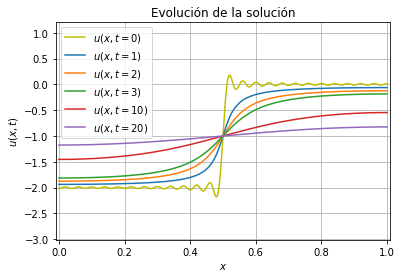

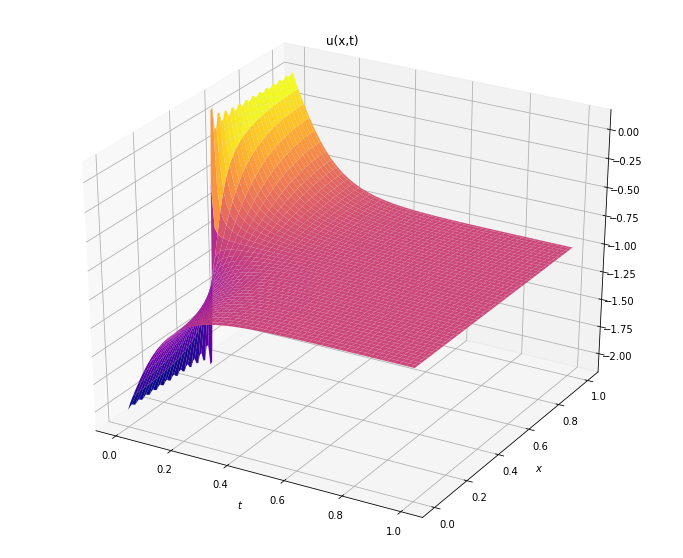

In [ ]:
plot(x,U[:,0],"y",label='$u(x,t=0)$') 
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-3.01,1.2]),grid(),legend()
show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="plasma"); 